# Business Metrics Analysis

**Project Overview**

This project focuses on analyzing user data for the entertainment app Procrastinate Pro+, which has been incurring losses over the past few months despite significant investments in advertising. The primary goal of the project is to identify the causes of the inefficiency in advertising campaigns and provide recommendations for improving profitability by analyzing user behavior, advertising expenses, and return on investment (ROI). The analysis includes examining user characteristics, acquisition sources, and evaluating ROI, conversion rates, and customer lifetime value (LTV) to optimize advertising costs.

**Data Description**

There are data on users acquired from May 1 to October 27, 2019, provided for the analysis in three datasets:

1. visits_info_short.csv — contains server logs with user visit data:
- **User Id**: unique identifier for each user;
- **Region**: user's country;
- **Device**: type of device used by the user;
- **Channel**: advertising channel through which the user accessed the app;
- **Session Start**: date and time when the session began;
- **Session End**: date and time when the session ended.

2. orders_info_short.csv — contains user order data:
- **User Id**: unique identifier for each user;
- **Event Dt**: date and time of the purchase;
- **Revenue**: amount of the order.

3. costs_info_short.csv — provides information on advertising expenditures:
- **dt**: date of the advertising campaign;
- **Channel**: advertising source;
- **costs**: expenses for the specific campaign.

**Key Steps**

1. **Data Loading and Preprocessing:**
- Import user visit, order, and advertising cost data from CSV files.
- Check for missing values and duplicates.
- Ensure the correctness of data types.

2. **Defining Functions for LTV, ROI, Retention, and Conversion Calculations.**

3. **Exploratory Data Analysis:**
- Profile users and determine user acquisition periods.
- Analyze users by country, device type, and advertising channels.
- Create tables reflecting the number of users and the share of paying users.

4. **Marketing Analysis:**
- Calculate total marketing expenses.
- Explore the distribution of costs across advertising sources.
- Visualize the spending trends over weeks and months.
- Calculate Customer Acquisition Cost (CAC) for each source.

5. **Advertising Profitability Evaluation:**
- Analyze LTV, ROI, and CAC graphs.
- Review user conversion and retention dynamics.
- Examine the profitability of ads by devices, countries, and advertising channels.

6. **Conclusions and Recommendations:**
- Identify the causes of user acquisition inefficiencies.
- Formulate recommendations for the marketing department.

## Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# loading data on website visits, orders, and advertising expenses
try:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )
except:
    visits, orders, costs = (
        pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    )

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
# renaming columns
visits = visits.rename(
    columns={
        'User Id':'user_id',
        'Region': 'region',
        'Device': 'device',
        'Channel': 'channel',
        'Session Start': 'session_start',
        'Session End': 'session_end',  
    }
)

In [6]:
# checking for duplicates
print(visits.duplicated(subset=['user_id', 'session_start']).sum())
visits.duplicated().sum()

0


0

In [7]:
# transforming time data
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [9]:
# number of unique users
visits['user_id'].nunique()

150008

In [10]:
# countries represented in the dataset
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [11]:
# types of devices
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [12]:
# advertising channels
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [13]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [15]:
# renaming columns
orders = orders.rename(
    columns={
        'User Id':'user_id',
        'Event Dt': 'event_dt',
        'Revenue': 'revenue',
    }
)

In [16]:
# checking for duplicates
orders.duplicated().sum()

0

In [17]:
# transforming time data
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders['event_dt'].dtype

dtype('<M8[ns]')

In [18]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [20]:
# renaming columns
costs = costs.rename(
    columns={
        'Channel': 'channel',
    }
)

In [21]:
# checking for duplicates
costs.duplicated().sum()

0

In [22]:
# transforming time data
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs['dt'].dtype

dtype('O')

In [23]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Conclusion**

Data from the three datasets has been successfully loaded and prepared for further analysis. There are no missing values or duplicates in the data. The columns with date and time have been transformed into the appropriate formats for accurate handling of time intervals. The other columns have the correct data types.

We also examined the categorical variables, which include:
- 150,008 unique users;
- 4 countries of users: USA, United Kingdom, France, Germany;
- 4 types of devices: iPhone, Android, PC, Mac;
- 10 advertising channels, as well as organic users.

## Defining Functions for Calculating and Visualizing Business Metrics

We will define functions for creating user profiles, calculating retention, conversion, LTV, and ROI, as well as functions for visualizing these metrics.

In [24]:
# function for creating user profiles

def get_profiles(sessions, orders, ad_costs):

    # finding parameters of first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit 
    # and the first day of the month in which the visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # adding an indicator for paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # counting the number of unique users
    # with the same acquisition source and date
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # merging advertising expenses and the number of acquired users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # dividing advertising expenses by the number of acquired users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding customer acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # customer acquisition cost for organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [25]:
# function for calculating retention

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # adding the payer column to the passed dimensions list
    dimensions = ['payer'] + dimensions

    # excluding users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting raw data for retention calculation
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # obtaining the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # obtaining the retention dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # returning both tables and raw data
    return result_raw, result_grouped, result_in_time

In [26]:
# function for calculating conversion

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # excluding users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determining the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculating the lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # grouping by cohort if there are no dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # function for grouping the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # dividing each cell in the row by the cohort size
        # to obtain the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # obtaining the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # removing 'cohort' from dimensions for the conversion dynamics table
    if 'cohort' in dimensions: 
        dimensions = []

    # obtaining the conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # returning both tables and raw data
    return result_raw, result_grouped, result_in_time

In [27]:
# function for calculating LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # excluding users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # adding purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculating user lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # grouping by cohort if there are no dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function for grouping by desired features
    def group_by_dimensions(df, dims, horizon_days):
        # building a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # finding the cumulative revenue sum
        result = result.fillna(0).cumsum(axis=1)
        # calculating cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # merging cohort sizes and the revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculating LTV: dividing each "cell" in the row by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        # excluding all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restoring cohort sizes
        result['cohort_size'] = cohort_sizes

        # collecting a dataframe with user data and CAC values,
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculating average CAC by parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculating ROI: dividing LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # removing rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restoring cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # adding CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table, keeping cohort sizes, CAC, and ROI for lifetimes
        # that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # returning the LTV and ROI tables
        return result, roi

    # obtaining the LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # removing 'cohort' from dimensions for the dynamics tables
    if 'cohort' in dimensions:
        dimensions = []

    # obtaining the dynamics tables for LTV and ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # table for LTV
        result_in_time,  # dynamics table for LTV
        roi_grouped,  # table for ROI
        roi_in_time,  # dynamics table for ROI
    )

In [28]:
# function for smoothing the dataframe

def filter_data(df, window):
    # applying a moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [29]:
# function for visualizing retention

def plot_retention(retention, retention_history, horizon, window=7):

    # setting the grid size for the plots
    plt.figure(figsize=(15, 10))

    # excluding cohort sizes and first-day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # in the dynamics table, keeping only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if only payer is in the retention table indexes,
    # adding a second feature — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the plot table — two columns and two rows, four cells,
    # in the first we plot the retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Paying Users')

    # in the second cell, we plot the retention curves for non-paying users,
    # with the vertical axis matching that of the graph in the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Non-paying Users')

    # in the third cell — dynamics of retention for paying users
    ax3 = plt.subplot(2, 2, 3)
    # obtaining column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filtering the data and plotting the graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Dynamics of Retention for Paying Users on the {}-th Day'.format(
            horizon
        )
    )

    # in the fourth cell — dynamics of retention for non-paying users
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filtering the data and plotting the graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Dynamics of Retention for Non-paying Users on the {}-th Day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [30]:
# function for visualizing conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # setting the grid size for the plots
    plt.figure(figsize=(15, 5))

    # excluding cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the dynamics table, keeping only the necessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # first graph — conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User Conversion')

    # second graph — dynamics of conversion
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # the columns of the pivot table will be all index columns except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title('Dynamics of User Conversion on the {}-th Day'.format(horizon))

    plt.tight_layout()
    plt.show()

In [31]:
# function for visualizing LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # setting the plotting grid for the graphs
    plt.figure(figsize=(20, 10))

    # excluding cohort sizes from the LTV table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the LTV dynamics table, keeping only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # recording customer acquisition cost in a separate dataframe
    cac_history = roi_history[['cac']]

    # excluding cohort sizes and CAC from the ROI table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the ROI dynamics table, keeping only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first graph — LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # second graph — dynamics of LTV
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # the columns of the pivot table will consist of all index columns except for the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title('Dynamics of User LTV on the {}-th Day'.format(horizon))

    # third graph — dynamics of CAC
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # the columns of the pivot table will consist of all index columns except for the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title('Dynamics of Customer Acquisition Cost')

    # fourth graph — ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Level of Return On Investment')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # fifth graph — dynamics of ROI
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # the columns of the pivot table will consist of all index columns except for the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Level of Return On Investment')
    plt.xlabel('Acquisition Date')
    plt.title('Dynamics of User ROI on the {}-th Day'.format(horizon))

    plt.tight_layout()
    plt.show()

## Exploratory Data Analysis

### User Profiles, User Acquisition Period

We will create user profiles and determine the minimum and maximum user acquisition dates.

In [32]:
# obtaining user profiles
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5))

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [33]:
# minimum and maximum user acquisition dates
profiles['first_ts'].agg(['min', 'max'])

min   2019-05-01 00:00:41
max   2019-10-27 23:59:04
Name: first_ts, dtype: datetime64[ns]

The obtained dates match the period specified in the technical specifications (from May 1 to October 27, 2019). This period indeed covers approximately six months. Therefore, we have confirmed that the data is correct.

### Analysis of Paying Users by Countries 

In [34]:
# number of users and share of paying users in each country
profiles.groupby('region').agg(
    total_users=('user_id', 'nunique'),
    payers_fraction=('payer', 'mean')
).assign(
    payers_fraction=lambda x: x['payers_fraction'] * 100
).sort_values('total_users', ascending=False).reset_index().style.format({
    'payers_fraction': '{:.2f}%'
})

,region,total_users,payers_fraction
0,United States,100002,6.90%
1,UK,17575,3.98%
2,France,17450,3.80%
3,Germany,14981,4.11%


### Analysis of Paying Users by Devices 

In [35]:
# number of users and the share of paying users using different devices
profiles.groupby('device').agg(
    total_users=('user_id', 'nunique'),
    payers_fraction=('payer', 'mean')
).assign(
    payers_fraction=lambda x: x['payers_fraction'] * 100
).sort_values('total_users', ascending=False).reset_index().style.format({
    'payers_fraction': '{:.2f}%'
})

,device,total_users,payers_fraction
0,iPhone,54479,6.21%
1,Android,35032,5.85%
2,PC,30455,5.05%
3,Mac,30042,6.36%


### Analysis of Paying Users by Advertising Sources 

In [36]:
# number of users and the share of paying users acquired through different advertising sources
profiles.groupby('channel').agg(
    total_users=('user_id', 'nunique'),
    payers_fraction=('payer', 'mean')
).assign(
    payers_fraction=lambda x: x['payers_fraction'] * 100
).sort_values('total_users', ascending=False).reset_index().style.format({
    'payers_fraction': '{:.2f}%'
})

,channel,total_users,payers_fraction
0,organic,56439,2.06%
1,FaceBoom,29144,12.20%
2,TipTop,19561,9.60%
3,OppleCreativeMedia,8605,2.71%
4,LeapBob,8553,3.06%
5,WahooNetBanner,8553,5.30%
6,RocketSuperAds,4448,7.91%
7,MediaTornado,4364,3.57%
8,YRabbit,4312,3.83%
9,AdNonSense,3880,11.34%


**Conclusion**

We conducted an exploratory data analysis and identified the following key insights.

The user acquisition period spans from May 1 to October 27, 2019, which is approximately six months.

The primary influx of users comes from the United States, which also has the highest share of paying users—nearly 7%. In countries such as Germany, the United Kingdom, and France, this share is somewhat lower, around 4%.

While iPhone users constitute the largest group, the highest share of paying users is observed among Mac users (6.4%). Android and PC users show a share of paying users between 5-6%.

Among advertising channels, FaceBoom, which is the largest one, attracts the most paying users (12.2%). Despite having the smallest user bases, AdNonSense (11.3%) and lambdaMediaAds (10.5%) also show high shares of paying users. The organic channel attracts the most users overall (56,439), but its share of paying users is significantly lower—only 2.1%.

Thus, while large channels like FaceBoom and TipTop are important for acquiring a broad audience, smaller channels like AdNonSense and lambdaMediaAds demonstrate high effectiveness in attracting paying customers despite their size.

## Marketing 

First, we will examine advertising expenses: the distribution of the expenses across advertising sources.

In [37]:
# total marketing expenses
total_costs = costs['costs'].sum()
round(total_costs, 2)

105497.3

In [38]:
# total expenses for each source and their share of the overall budget
channel_costs = costs.groupby('channel')['costs'].sum().reset_index().sort_values('costs', ascending=False)
channel_costs['budget_share'] = (channel_costs['costs'] / total_costs)
channel_costs = channel_costs.style.format({
    'budget_share': '{:.2%}'
})
channel_costs

,channel,costs,budget_share
6,TipTop,54751.300000,51.90%
1,FaceBoom,32445.600000,30.75%
7,WahooNetBanner,5151.000000,4.88%
0,AdNonSense,3911.250000,3.71%
4,OppleCreativeMedia,2151.250000,2.04%
5,RocketSuperAds,1833.000000,1.74%
2,LeapBob,1797.600000,1.70%
9,lambdaMediaAds,1557.600000,1.48%
3,MediaTornado,954.480000,0.90%
8,YRabbit,944.220000,0.90%


TipTop turned out to be the most expensive channel, accounting for more than half of the total budget (51.9%). In second place is FaceBoom, which also requires a significant investment, taking up 30.75% of the budget. It will be necessary to evaluate the effectiveness of these channels to ensure that the investments in them are justified.

Among the other channels, expenses are distributed relatively evenly. MediaTornado and YRabbit received the smallest investments, each accounting for only 0.9% of the total budget.

We will take a look at the spending trends over time, broken down by weeks and months for each advertising source.

In [39]:
# сonverting the date column to datetime format
costs['dt'] = pd.to_datetime(costs['dt'])
# adding columns for weeks and months
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

In [40]:
# pivot table of expenses by week for each channel
weekly_expenses = costs.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
)
# indexes of channels sorted in descending order by total expenses
sorted_channels = weekly_expenses.sum().sort_values(ascending=False).index
# sorting the pivot table by weeks
weekly_expenses = weekly_expenses[sorted_channels]
weekly_expenses

channel,TipTop,FaceBoom,WahooNetBanner,AdNonSense,OppleCreativeMedia,RocketSuperAds,LeapBob,lambdaMediaAds,MediaTornado,YRabbit
week,,,,,,,,,,
18,347.0,535.7,49.2,211.05,24.00,99.450,16.80,81.6,38.64,52.20
19,470.0,750.2,92.4,273.00,34.50,139.230,31.71,103.2,61.68,75.90
20,454.0,755.7,90.0,265.65,27.50,138.060,26.67,90.4,59.04,69.30
21,801.8,722.7,79.2,266.70,34.25,131.040,26.67,119.2,50.16,65.40
22,1421.2,1208.9,179.4,202.65,81.75,97.695,65.52,83.2,36.96,49.80
23,1223.6,1081.3,196.8,102.90,79.50,76.050,66.99,35.2,27.60,25.80
24,1121.0,1042.8,166.2,96.60,71.50,63.180,52.29,45.6,29.76,17.46
25,1474.4,1280.4,201.6,141.75,79.75,80.730,68.46,40.0,32.16,22.14
26,2343.6,1647.8,285.0,148.05,107.00,78.260,99.75,59.2,40.56,27.90


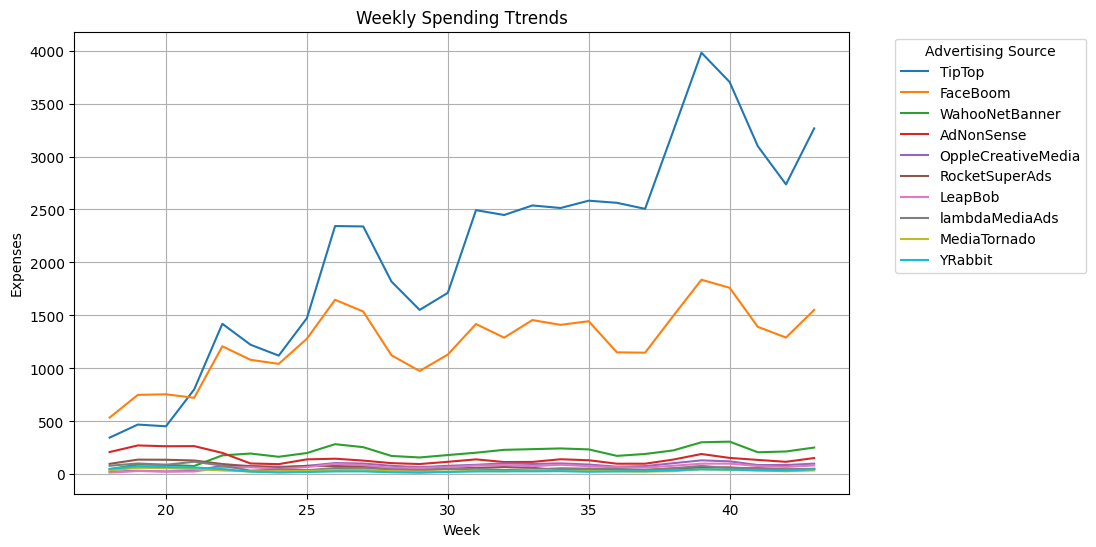

In [41]:
# plotting the weekly spending trends
weekly_expenses.plot(figsize=(10, 6))
plt.title('Weekly Spending Ttrends')
plt.xlabel('Week')
plt.ylabel('Expenses')
plt.legend(title='Advertising Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [42]:
# pivot table of expenses by month for each advertising channel
monthly_expenses = costs.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
)
# sorting the pivot table by month
monthly_expenses = monthly_expenses[sorted_channels]
monthly_expenses

channel,TipTop,FaceBoom,WahooNetBanner,AdNonSense,OppleCreativeMedia,RocketSuperAds,LeapBob,lambdaMediaAds,MediaTornado,YRabbit
month,,,,,,,,,,
5,2981.0,3524.4,418.8,1169.70,169.75,577.980,140.28,458.4,238.56,299.70
6,6675.6,5501.1,921.0,538.65,370.00,325.715,314.58,199.2,138.00,106.20
7,8410.2,5294.3,851.4,504.00,366.50,252.070,313.53,219.2,138.48,97.38
8,11202.0,6274.4,1040.4,579.60,439.25,253.110,369.81,220.0,154.56,124.74
9,13232.5,6114.9,977.4,581.70,427.75,218.400,343.98,247.2,144.72,152.79
10,12250.0,5736.5,942.0,537.60,378.00,205.725,315.42,213.6,140.16,163.41


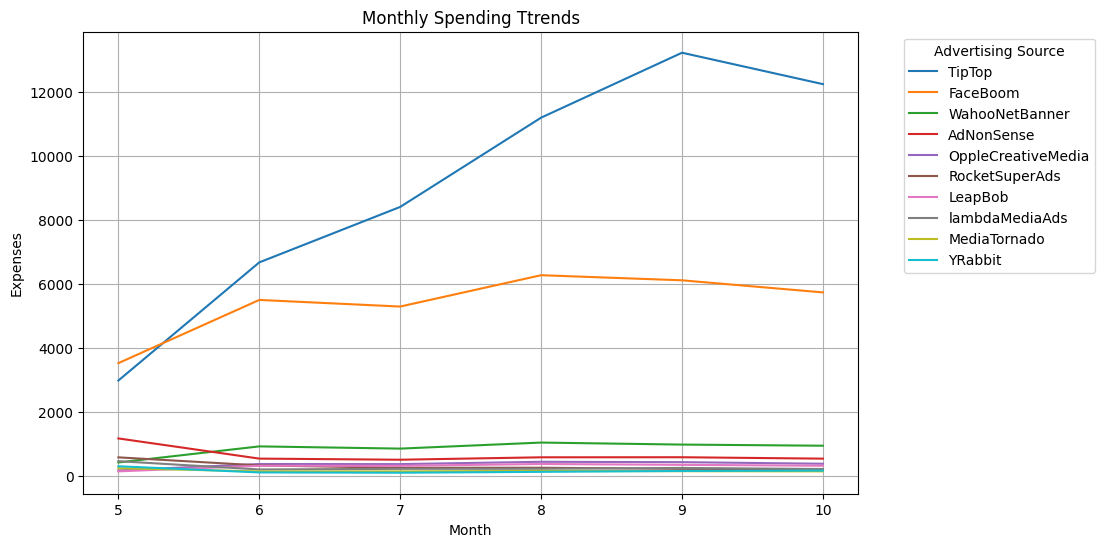

In [43]:
# plotting the monthly spending trends
monthly_expenses.plot(figsize=(10, 6))
plt.title('Monthly Spending Ttrends')
plt.xlabel('Month')
plt.ylabel('Expenses')
plt.legend(title='Advertising Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In both graphs depicting advertising spending dynamics, it is evident that, compared to other channels, TipTop and FaceBoom stand out with initially higher expenses, which show a sharp increase from the beginning of the period, reaching their peak by the end of September, in week 39. This indicates an intensification of the advertising campaign at the end of summer and the beginning of autumn. Over the analyzed period, weekly spending on TipTop increased more than ninefold. The increase in spending on FaceBoom is much smoother compared to TipTop.

The other channels show consistently lower expenses compared to the leaders, with minor weekly fluctuations. Slightly higher expenses are noted for the WahooNetBanner and AdNonSense channels.

It is recommended to conduct a detailed profitability analysis of the TipTop and FaceBoom channels, as they consume the majority of the advertising budget.

We'll calculate the average customer acquisition cost (CAC) for each source, excluding organic users from the analysis, as they do not incur any advertising costs.

In [44]:
# filtering users with organic traffic
profiles = profiles.query('channel != "organic"')

In [45]:
# average CAC for each advertising channel
profiles.groupby('channel')['acquisition_cost'].mean().reset_index().sort_values('acquisition_cost', ascending=False)

,channel,acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


The TipTop channel has the highest customer acquisition cost, necessitating further analysis to identify the factors influencing these expenses. The FaceBoom and AdNonSense channels show moderate costs. In contrast, the YRabbit, MediaTornado, and LeapBob channels demonstrate the lowest CAC, all below 0.22.

**Conclusion**

The total marketing expenses amounted to 105,497.30.

Based on the monthly data, the main expenses occurred in September, which may indicate seasonality in advertising activity.

The TipTop and FaceBoom channels stand out with significantly higher costs and show a systematic increase, peaking in week 39, with TipTop experiencing a particularly sharp rise in spending. In contrast, the other channels display stable and considerably lower expenses.

The TipTop and FaceBoom channels account for the overwhelming majority of the budget, at 51.90% and 30.75%, respectively. Additionally, TipTop has the highest customer acquisition cost (CAC). However, the share of paying users coming from this source is not very high (9.6% for TipTop compared to 12.2% for FaceBoom). Thus, further analysis is needed to assess the cost-effectiveness of the TipTop and FaceBoom channels, with a primary focus on TipTop.

## Evaluation of Advertising Return on Investment (ROI) 

### Overall LTV, CAC and ROI 

We will analyze advertising ROI using LTV, ROI, and CAC graphs. Let’s assume the date is November 1, 2019, and the business plan states that users should break even no later than two weeks after acquisition.

In [46]:
# moment of analysis
observation_date = datetime(2019, 11, 1).date()

# analysis horizon
horizon_days = 14

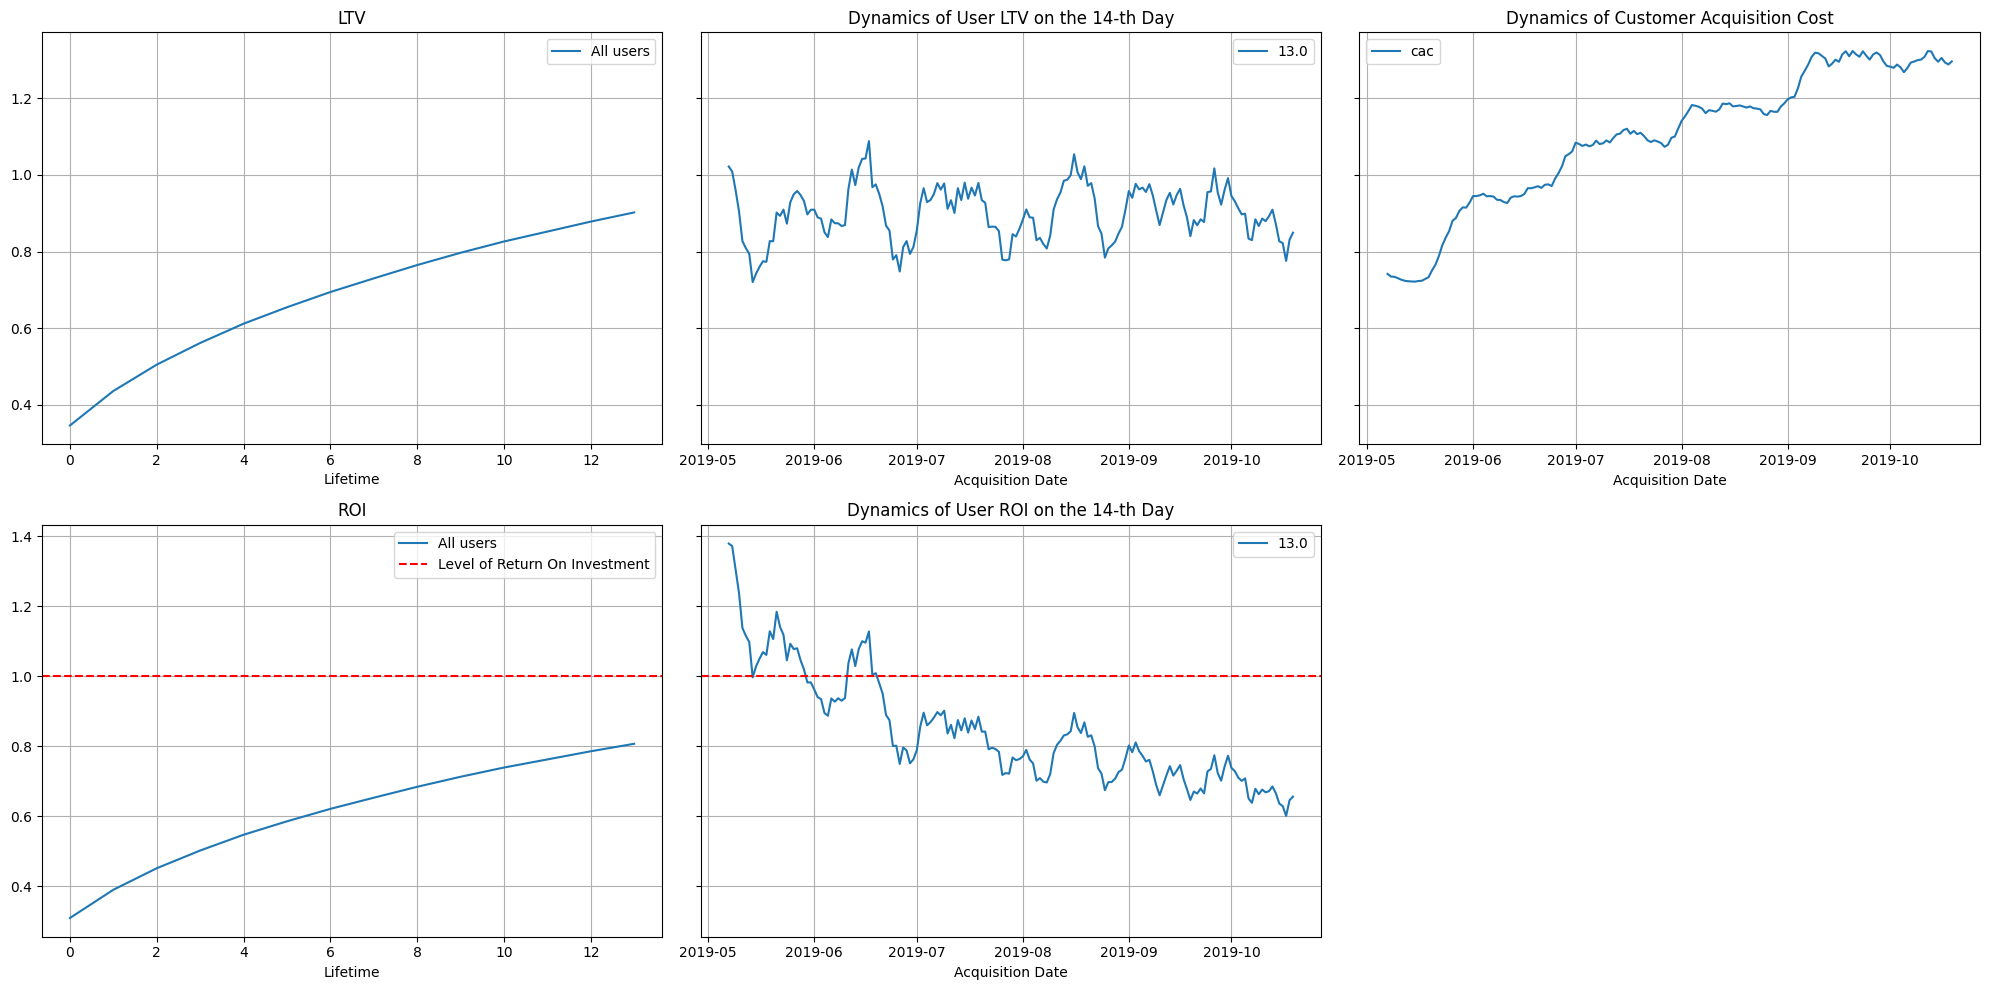

In [47]:
# calculating LTV and ROI.
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# plotting the graphs
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

In [48]:
# CAC at the beginning of the period (2019-05-01).
round(roi_history.iloc[0, 1], 2)

0.78

In [49]:
# CAC on the last date considered (2019-10-19)
round(roi_history.iloc[-1,1], 2)

1.34

In [50]:
# LTV dynamics
ltv_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.34558,0.435754,0.504507,0.56109,0.611436,0.654368,0.69414,0.729778,0.764619,0.796665,0.826152,0.85207,0.878116,0.90203


In [51]:
# ROI dynamics
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


**CAC (Customer Acquisition Cost):**

CAC at the beginning of the period is 0.78, and by the end, it rises to around 1.34, showing a consistent upward trend. A sharp increase in CAC is observed by early June, indicating that over time, the cost of acquiring customers is growing. This may be attributed to the company’s chosen strategy (expanding advertising campaigns and reaching new audiences) or a decrease in the efficiency of advertising channels.

**LTV (Lifetime Value):**

LTV is 0.35 on the first day, reaching 0.9 by day 14. The growth is steadily strong, slowing down only slightly over time. This suggests that, on average, each user generates significant revenue. Despite some fluctuations in the dynamics, by day 14, LTV remains stable, indicating consistent quality of the acquired users.


**ROI (Return on Investment):**

On the first day, ROI is at 0.31, indicating a negative initial return on investment. Over time, ROI increases but does not cross the 1.0 mark within two weeks, only reaching 0.81. This suggests that advertising costs are not being fully recouped. The ROI dynamics graph shows a decline from a peak of around 1.4 to 0.7 by day 14. Given that user revenue remains stable, this drop in ROI may indicate decreasing advertising efficiency as spending increases.

**Return on Investment in the business plan with a 14-day horizon**

According to the business plan, advertising should recover investment within two weeks. However, the ROI data shows that this metric remains below the breakeven point (ROI = 1.0) by day 14, indicating that the advertising costs are not recouped after 14 days. Additionally, the increase in CAC raises concerns, as its growth could make payback problematic in the future, especially if LTV dynamics slow down.

### Overall Conversion and Retention

We will check the user conversion and its dynamics, as well as user retention.

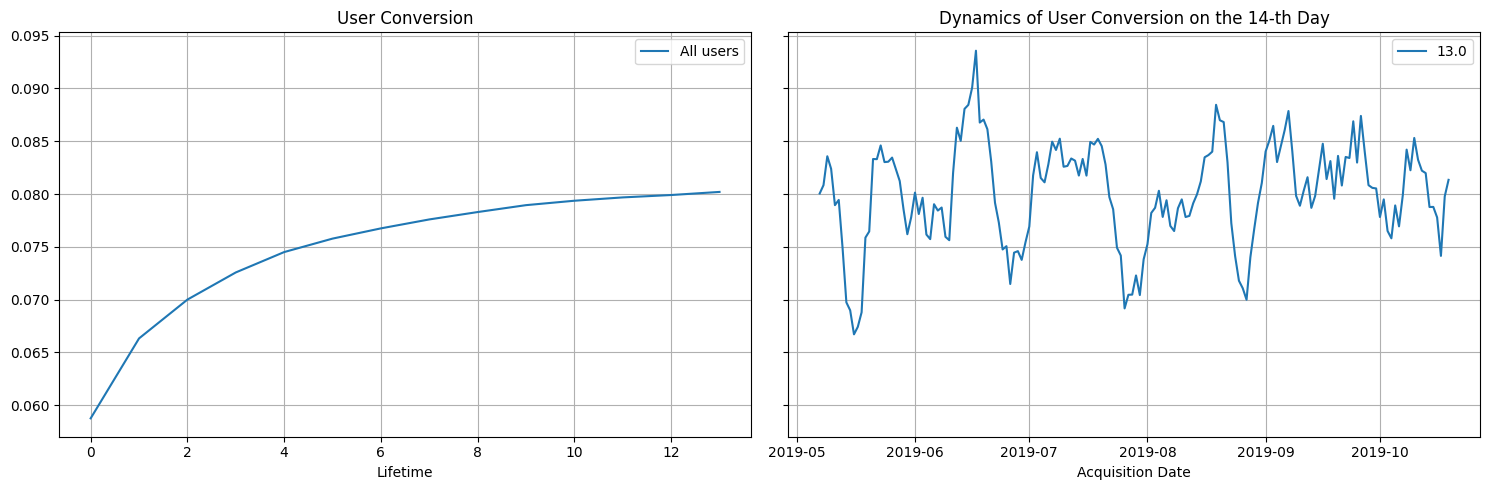

In [52]:
# overall conversion

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

In [53]:
# conversion on the 1st and 14th days
(
    conversion_grouped[[0,13]]
    .rename(columns={0: 'conv_1_day', 13: 'conv_14_day'})
    .apply(lambda x: x * 100)
    .applymap(lambda x: f"{x:.2f}%")
)

,conv_1_day,conv_14_day
cohort,,
All users,5.88%,8.02%


The conversion rate on the 1st day is 5.9%, and on the 14th day, it is 8.0%. This indicates that 2.1% of users make a purchase not immediately, but within the first two weeks. After the 1st day, the conversion rate increases, but the growth rate slows down: the increase in the early days is greater than in the later days, as most users ready to make a purchase do so in the initial days. Subsequently, growth slows down because the remaining users are less likely to take action. The 2.1% who complete the desired action between days 1 and 14 are likely postponing their purchase for various reasons—perhaps they are researching the product, contemplating the purchase, or waiting for additional incentives (discounts, reminders, etc.).

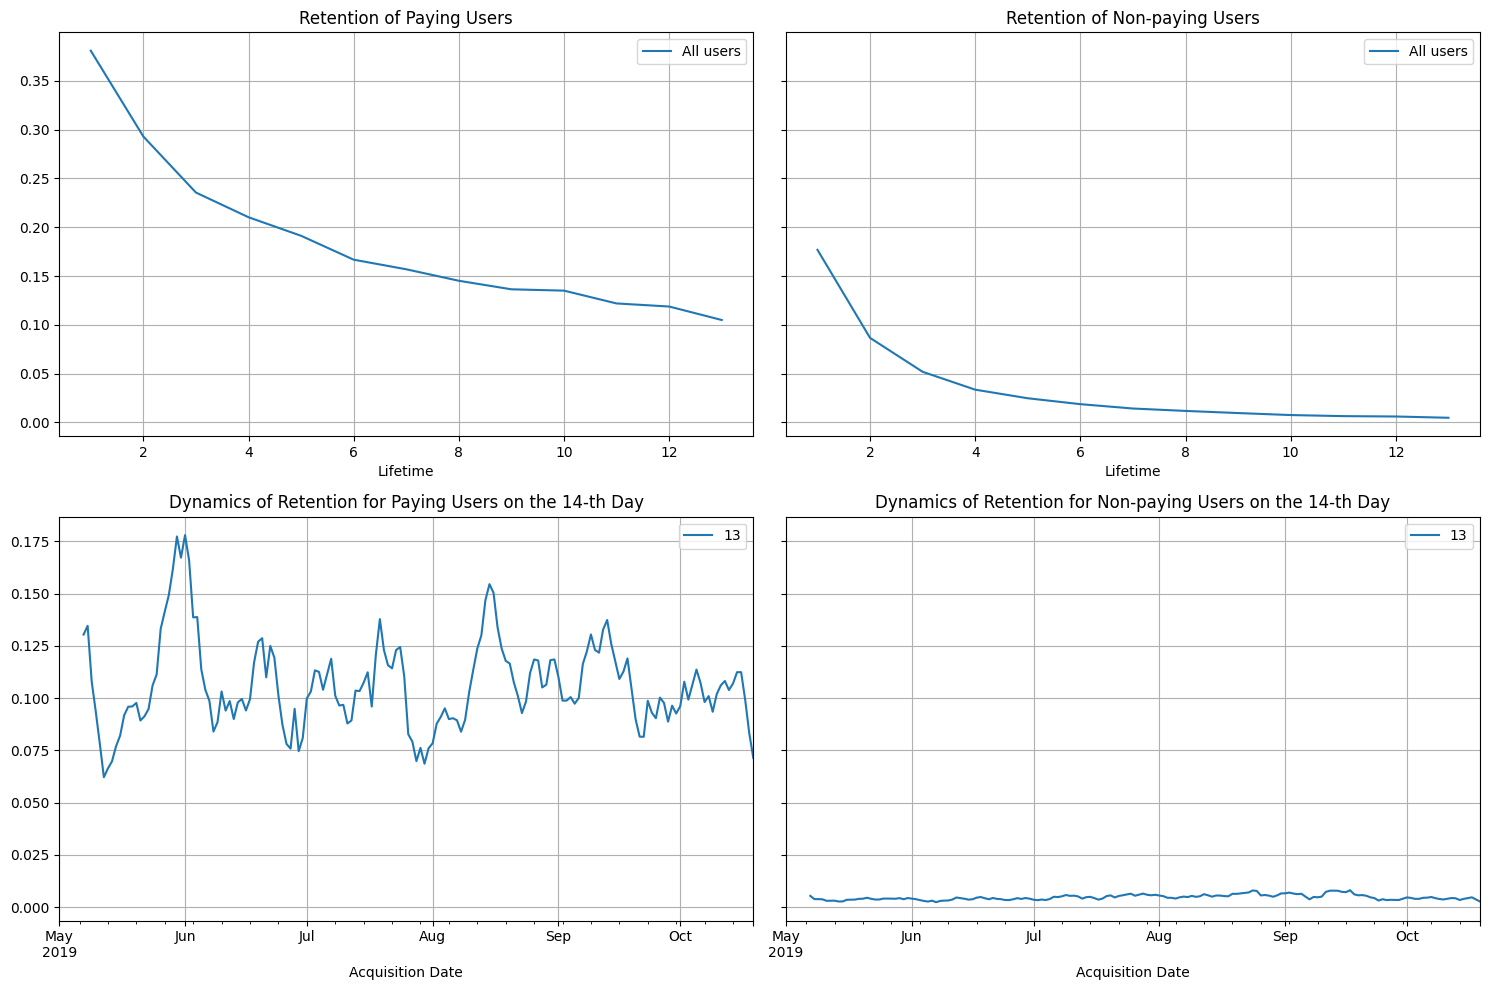

In [54]:
# overall retention

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

In [55]:
# retention on the 2nd and 14th days
(
    retention_grouped.loc[True, [1, 13]]
    .to_frame()
    .rename(index={1: '2nd_day', 13: '14th_day'}, columns={True: 'retention'})
    .apply(lambda x: x * 100)
    .applymap(lambda x: f"{x:.2f}%")
)

,retention
2nd_day,38.10%
14th_day,10.49%


The retention rate smoothly decreases during the period, with 38.1% of paying users remaining active on day 2, and by day 14, this metric drops to 10.5%.

The retention dynamics graph for paying users shows that by day 14, the retention rate fluctuates slightly but remains generally stable. The 10.5% of users still active after this period form the "core" user segment, which is crucial to maintain, as they demonstrate greater loyalty.

For non-paying users, retention is significantly lower — around 18% on day 1, quickly dropping to almost zero by day 14. This is typical: users who do not pay for the product tend to be less loyal and lose interest more rapidly.

### Conversion and Retention by Devices

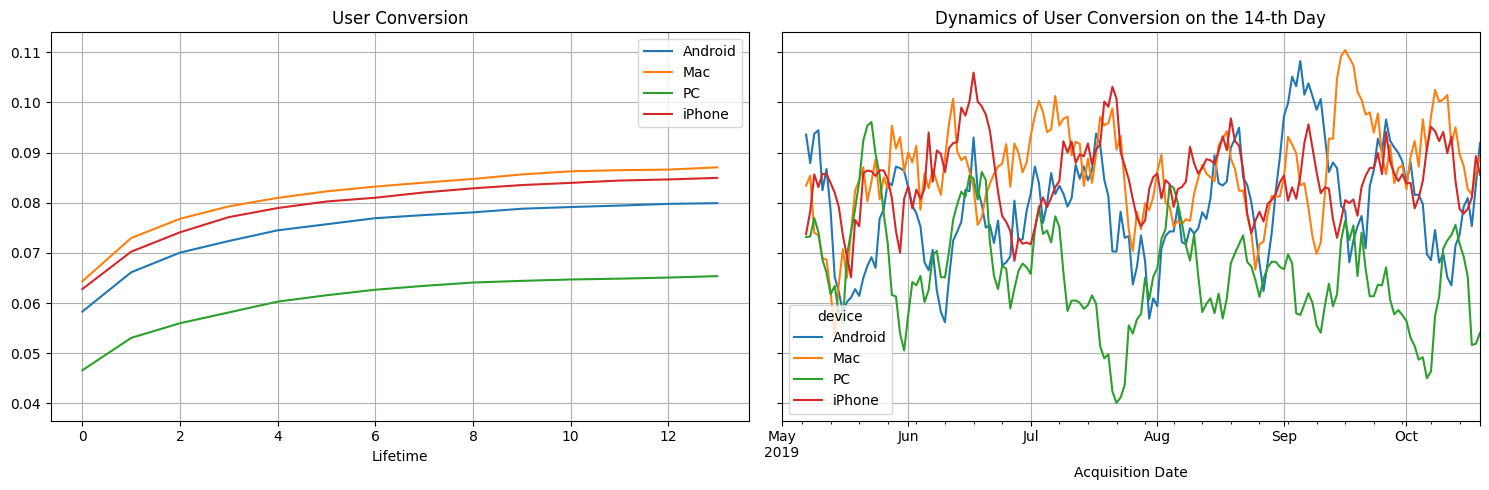

In [56]:
# conversion by devices

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

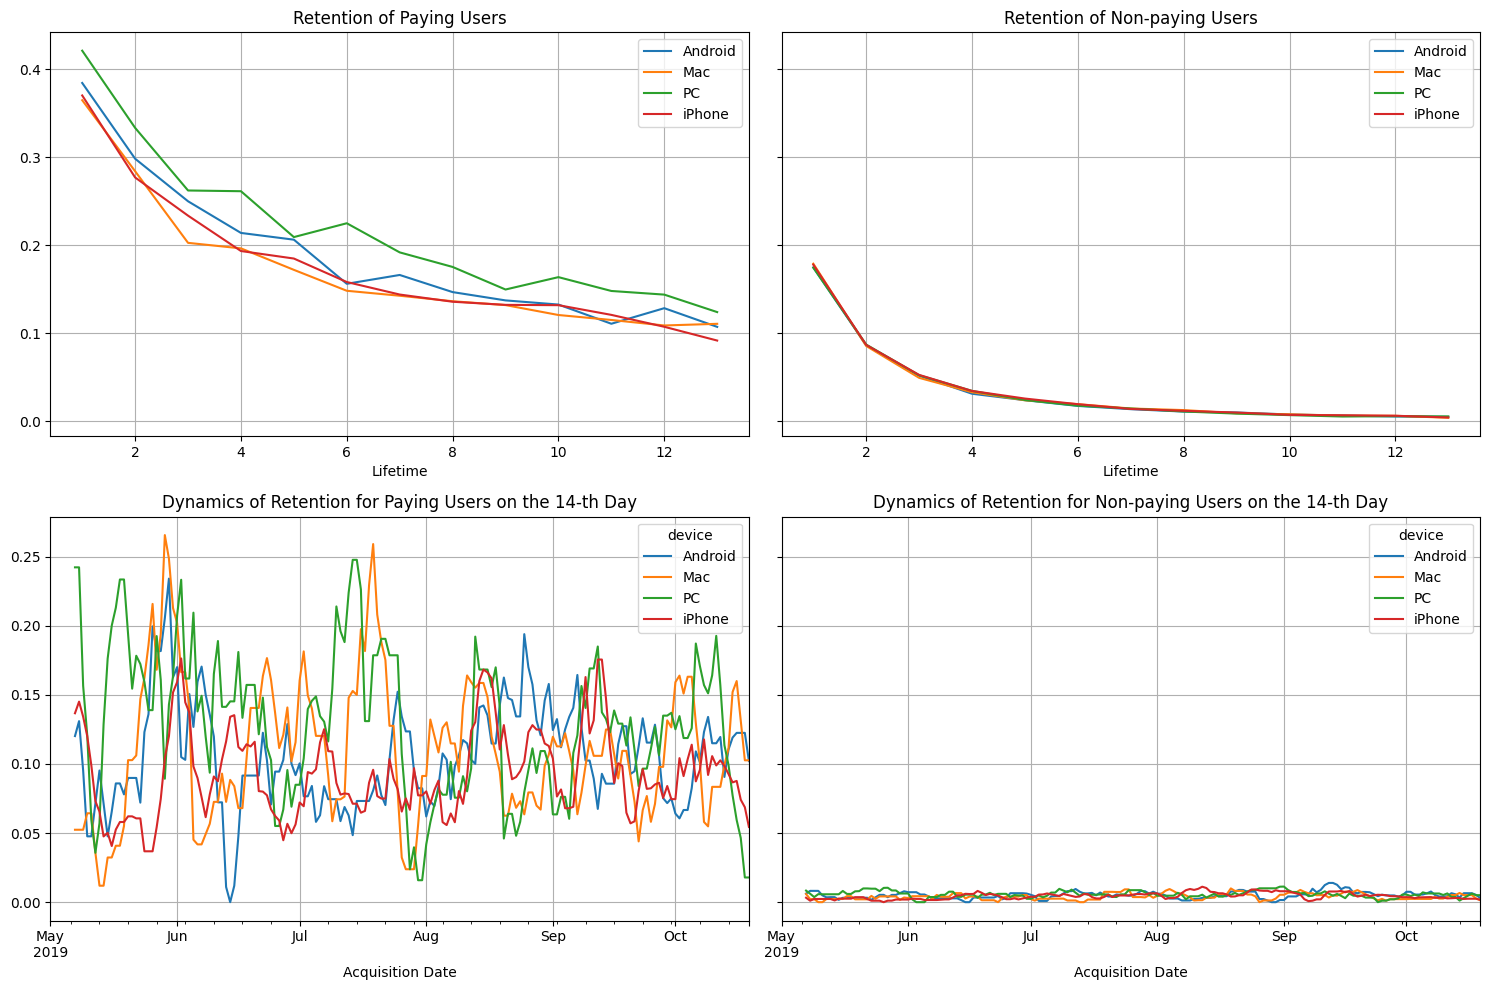

In [57]:
# retention by devices

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Mac and iPhone users demonstrate the highest conversion rates, which may indicate that owners of these devices are more inclined to make purchases. This could be attributed to higher incomes among these users and their ability to afford high-quality, expensive devices. It may also suggest that the product is more convenient to use on these platforms. Android shows a slightly lower but still decent conversion rate. The lowest conversion rate is observed on PC.

Retention of paying users is significantly higher than that of non-paying users. Non-paying users tend to lose interest more quickly. Regardless of the device, retention of non-paying users is already at least twice as low as that of paying users on the first day, dropping from 17-18% on day 1 to near zero by day 14.

Among paying users, PC shows the highest retention throughout the entire period, especially in the early stages. This may suggest loyalty among users who make purchases on PC, possibly linked to the product being used for work or study purposes.

For other devices, retention values among paying users are similar, though Android tend to retain slightly better than Apple. iPhone shows the lowest retention among paying users, which may indicate that while iPhone users make purchases, they lose interest in the product faster compared to users of other devices.

### Conversion and Retention by Countries 

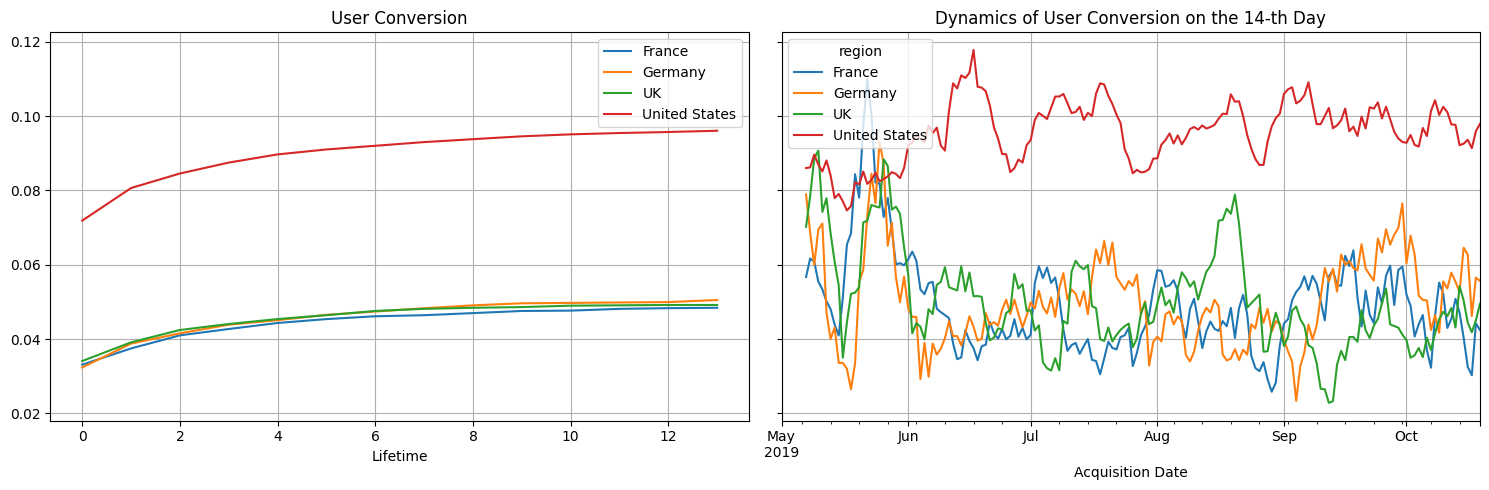

In [58]:
# conversion by countries

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

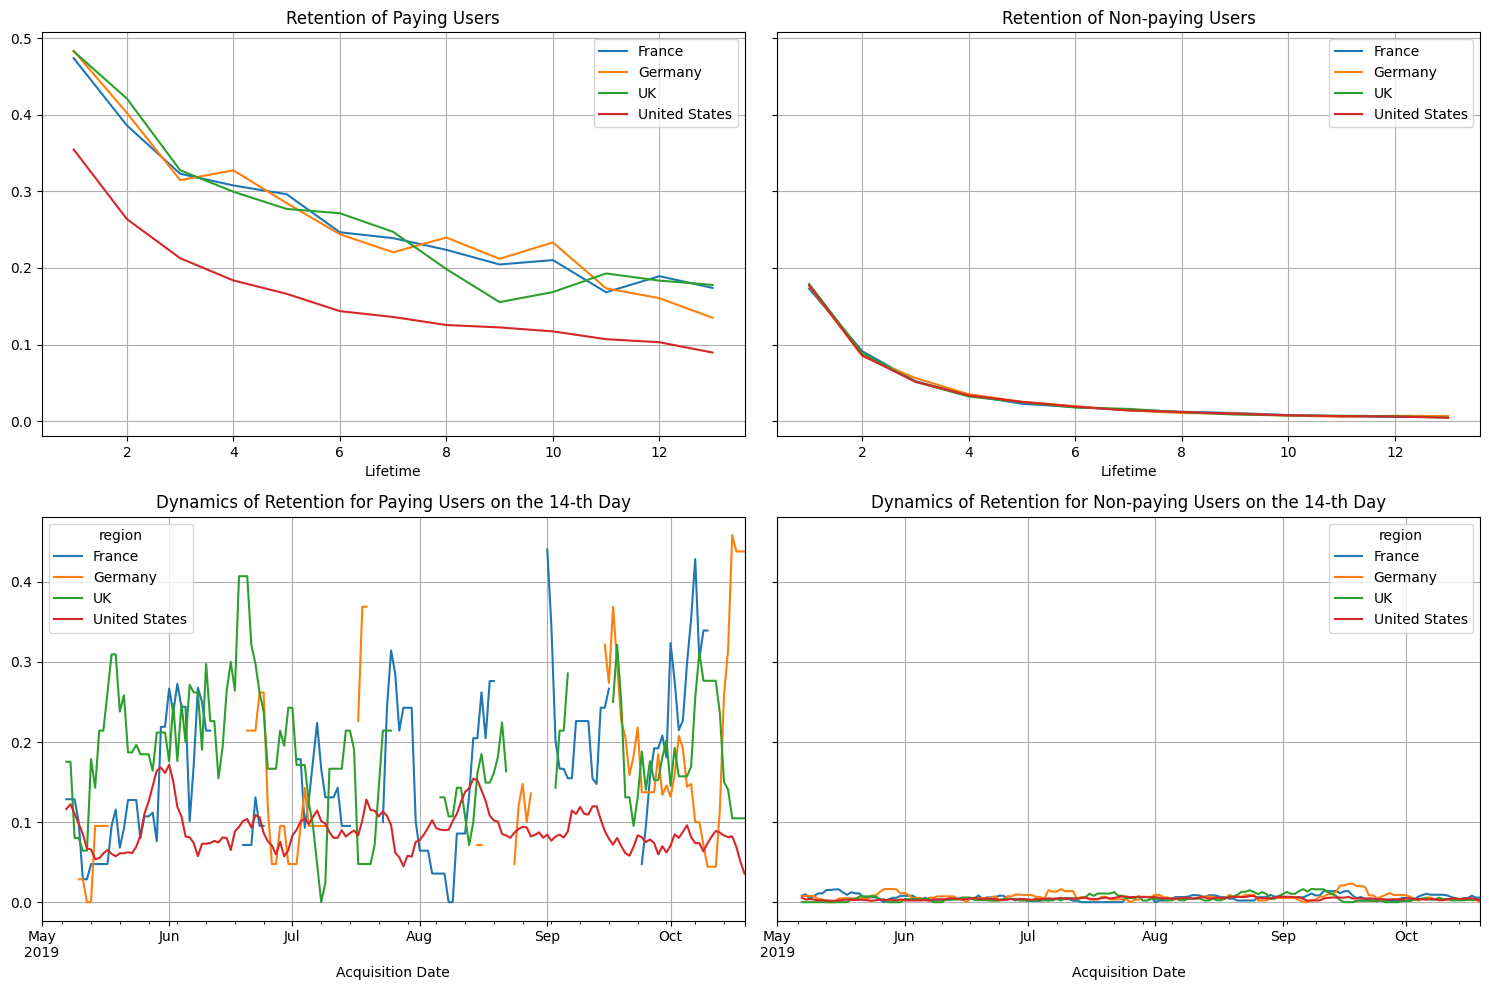

In [59]:
# retention by countries

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Users from the United States demonstrate the highest conversion rate among all countries, which is nearly twice as high as in the others. This suggests greater engagement and a higher willingness to make purchases within the first two weeks after acquisition. The United Kingdom, Germany, and France show lower conversion rates, remaining at roughly the same level.

In terms of paying user retention, the United Kingdom, Germany, and France exhibit similar retention trends, with minor differences. By day 14, retention in these countries is around 15%, indicating that users continue to actively engage with the product throughout the observation period, reflecting a high level of loyalty.

In the United States, despite the high conversion rate, retention among paying users is lower, which could suggest a quicker decline in interest after making a purchase.

Regardless of the region, non-paying users quickly lose interest in the product, with retention dropping to nearly zero by the end of the observation period.

### Conversion and Retention by Advertising Sources 

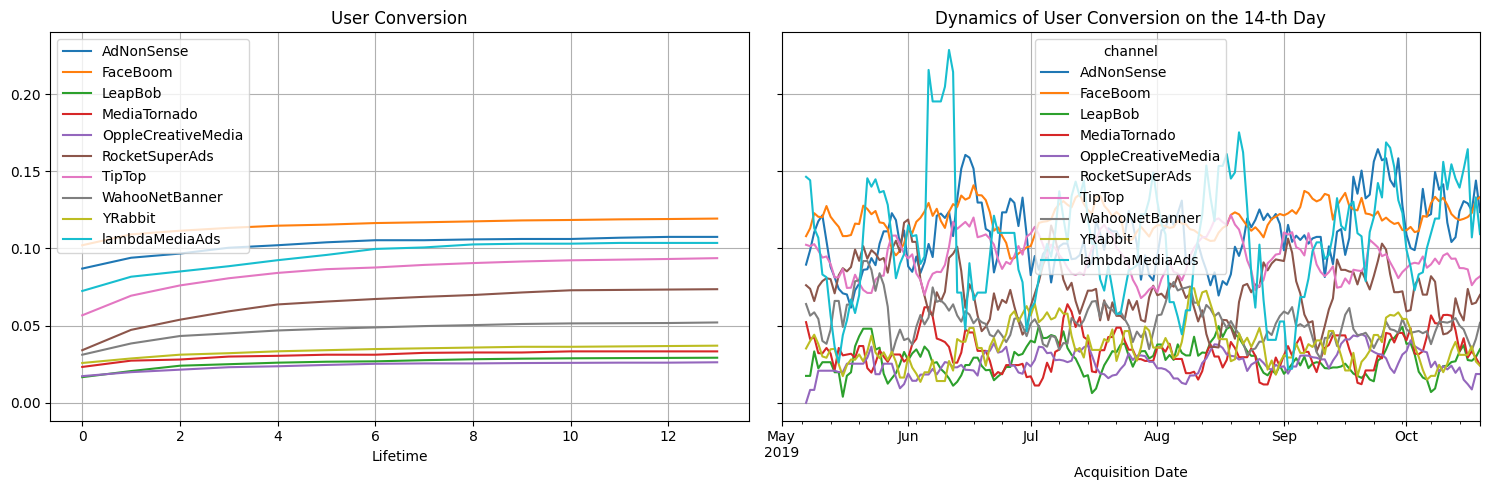

In [60]:
# conversion by advertising sources

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

In [61]:
# initial and final conversion for paying users by channels
(
    conversion_grouped.loc[:, [0, 13]]
    .rename(columns={0: 'conv_1_day', 13: 'conv_14_day'})
    .sort_values('conv_14_day', ascending=False)
    .apply(lambda x: x * 100)
    .applymap(lambda x: f"{x:.2f}%")
)

,conv_1_day,conv_14_day
channel,,
FaceBoom,10.21%,11.94%
AdNonSense,8.70%,10.75%
lambdaMediaAds,7.25%,10.36%
TipTop,5.67%,9.37%
RocketSuperAds,3.41%,7.36%
WahooNetBanner,3.12%,5.21%
YRabbit,2.58%,3.71%
MediaTornado,2.33%,3.34%
LeapBob,1.67%,2.92%


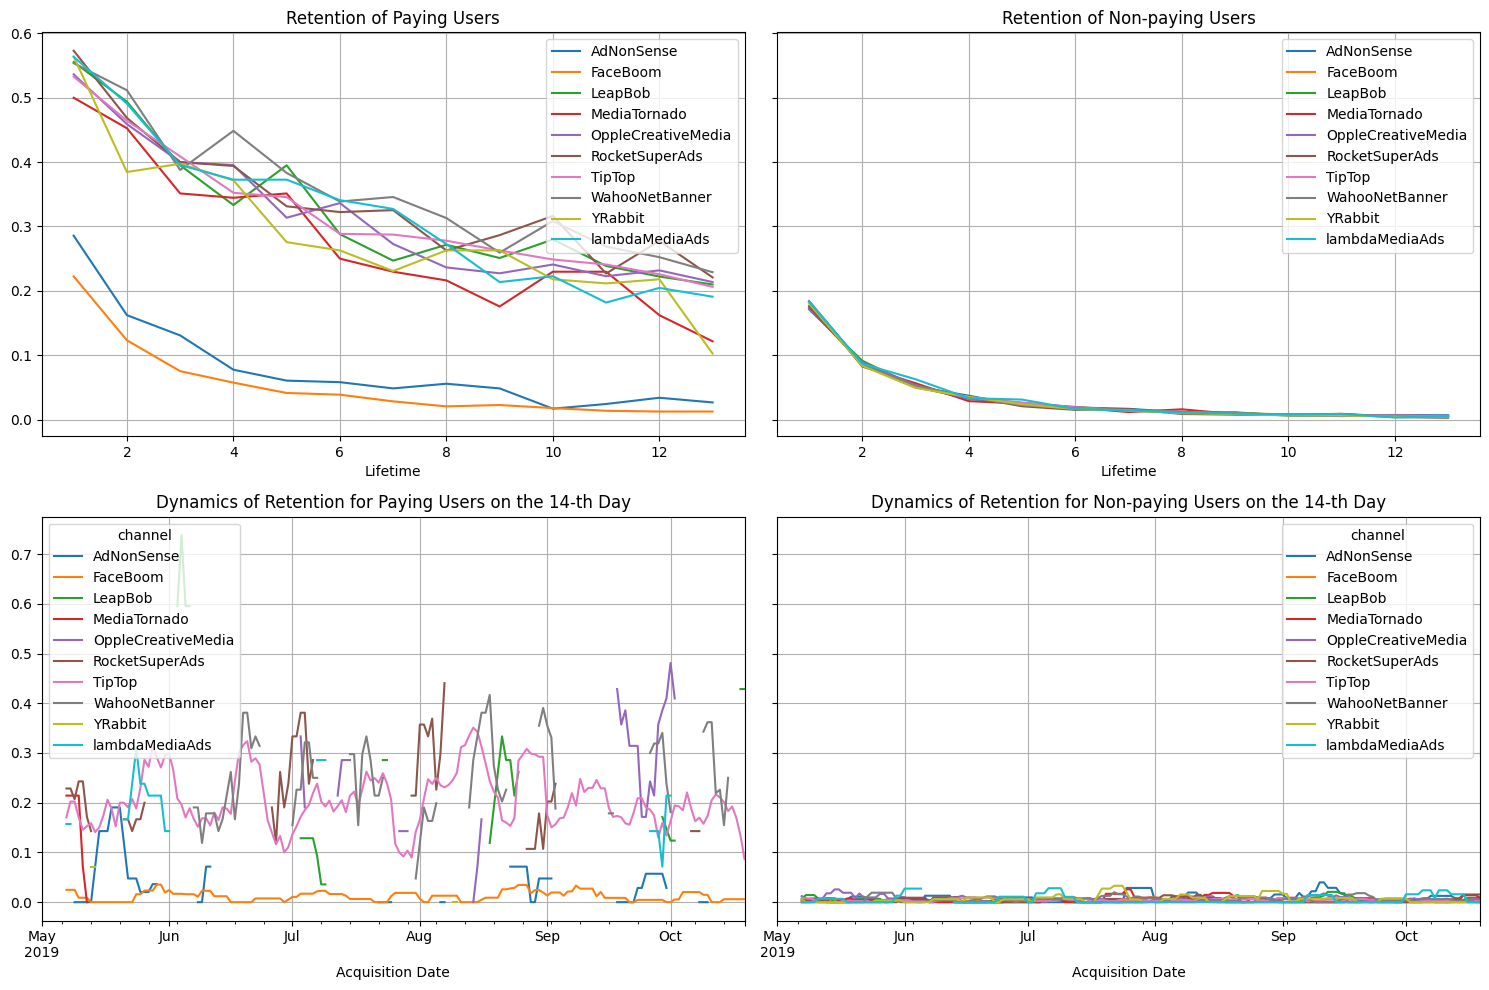

In [62]:
# retention by advertising sources

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

In [63]:
# initial and final retention for paying users by channels
(
    retention_grouped.loc[True, [1, 13]]
    .rename(columns={1: 'reten_2nd_day', 13: 'reten_14th_day'})
    .sort_values('reten_14th_day', ascending=False)
    .apply(lambda x: x * 100)
    .applymap(lambda x: f"{x:.2f}%")
)

,reten_2nd_day,reten_14th_day
channel,,
WahooNetBanner,55.37%,22.90%
RocketSuperAds,57.31%,22.09%
OppleCreativeMedia,53.64%,21.36%
LeapBob,55.56%,20.99%
TipTop,53.28%,20.62%
lambdaMediaAds,56.36%,19.09%
MediaTornado,50.00%,12.16%
YRabbit,56.41%,10.26%
AdNonSense,28.57%,2.66%


Among paying users, the FaceBoom channel leads in conversion rates, showing the highest value on day 1 and a steady increase throughout the observation period, reaching nearly 12% by day 14. This indicates its effectiveness in attracting users and converting them into customers.

AdNonSense, lambdaMediaAds, and TipTop also show good results, although not as strong as FaceBoom.

The channels with the lowest conversion rates are LeapBob and OppleCreativeMedia, with conversion not even reaching 3% over the two-week period.

Significantly lower retention among paying users is observed for FaceBoom and AdNonSense compared to other channels. All other channels exhibit higher retention levels.

An analysis of the reasons for the low retention rates for FaceBoom and AdNonSense should be conducted.

### LTV, CAC and ROI by Devices 

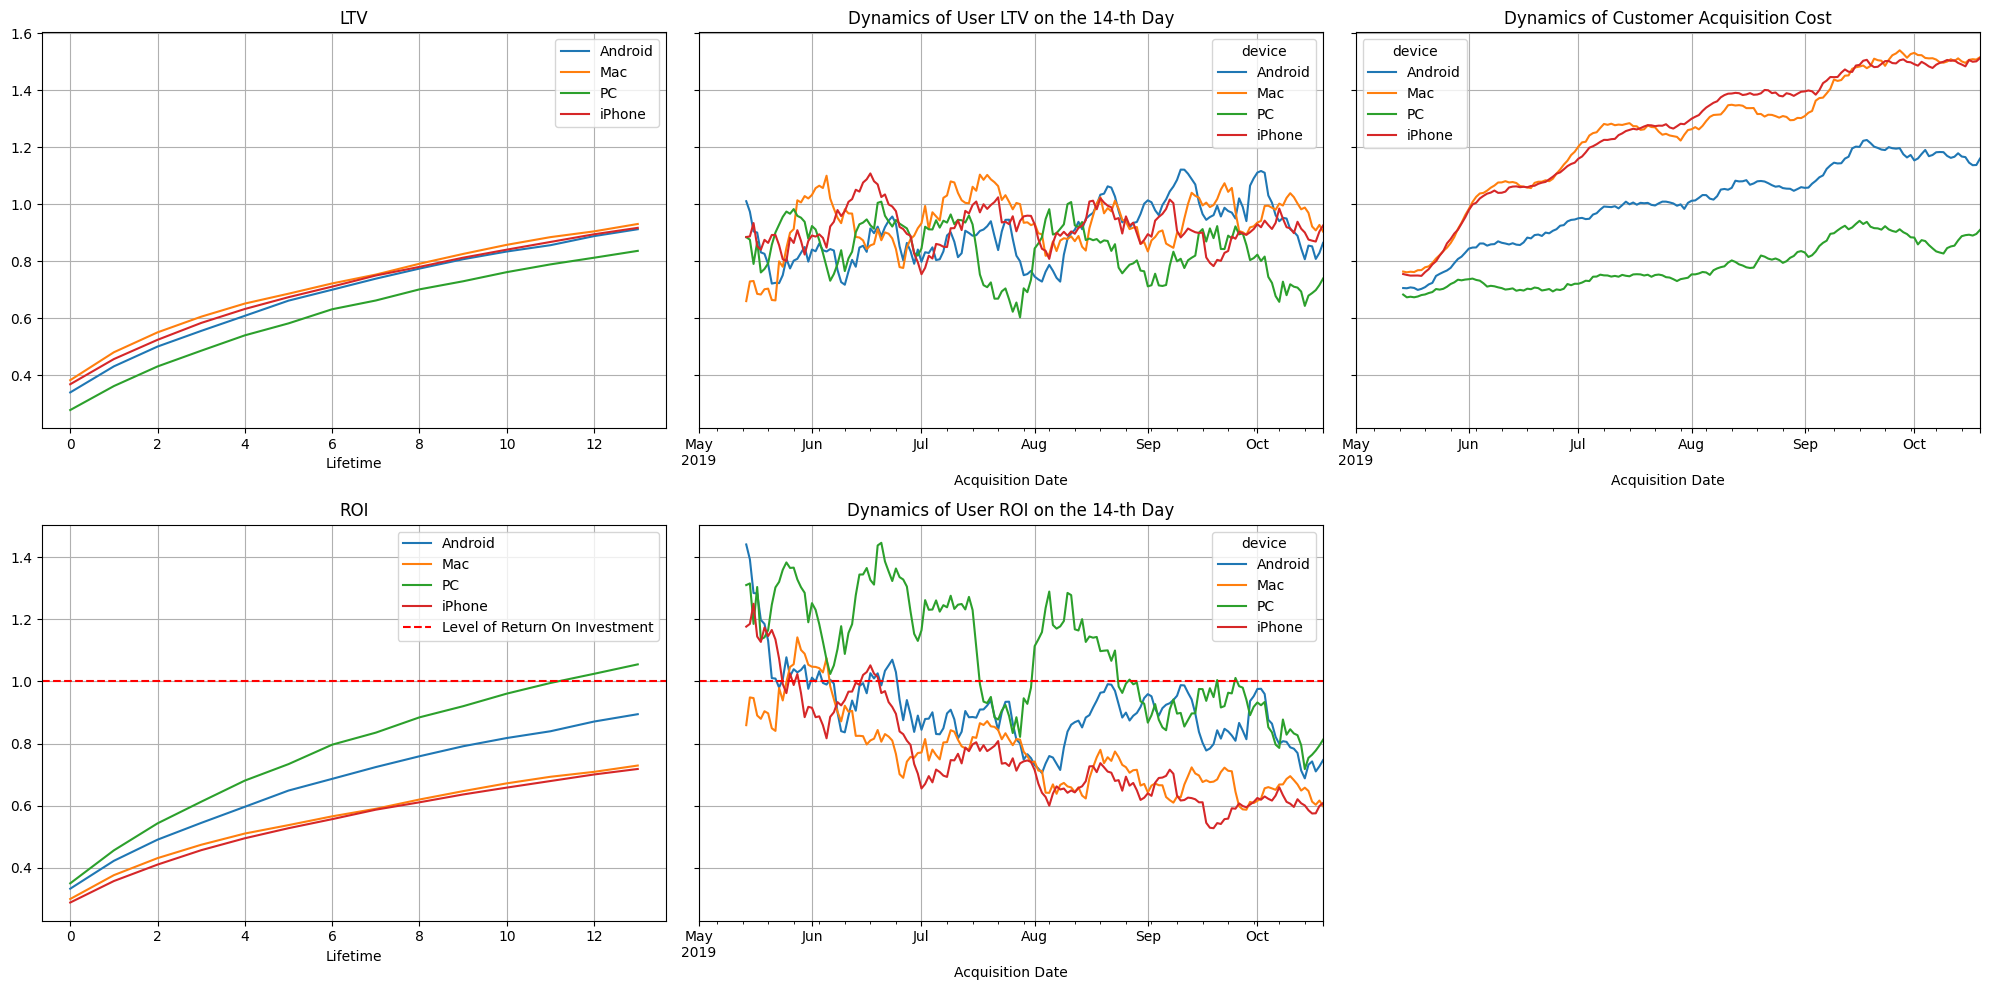

In [64]:
# LTV, CAC and ROI by devices

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

LTV remains stable over the 14-day period across all devices, indicating high customer value and user satisfaction.

The ROI graph shows that advertising is only profitable on the PC device, where the ROI crosses the 1.0 mark and turns profitable by day 12. Advertising on Android, Mac, and iPhone does not yield a return.

The ROI dynamics graph clearly indicates a negative trend: values for all devices steadily decline and drop below the 1.0 mark by day 14, suggesting a decrease in the effectiveness of advertising campaigns.

All devices show an increase in CAC, particularly iPhone and Mac, which may indicate rising costs for customer acquisition due to declining effectiveness of advertising strategies. The initial and final CAC values show a significant increase, highlighting the need to reevaluate marketing approaches.

### LTV, CAC and ROI by Countries 

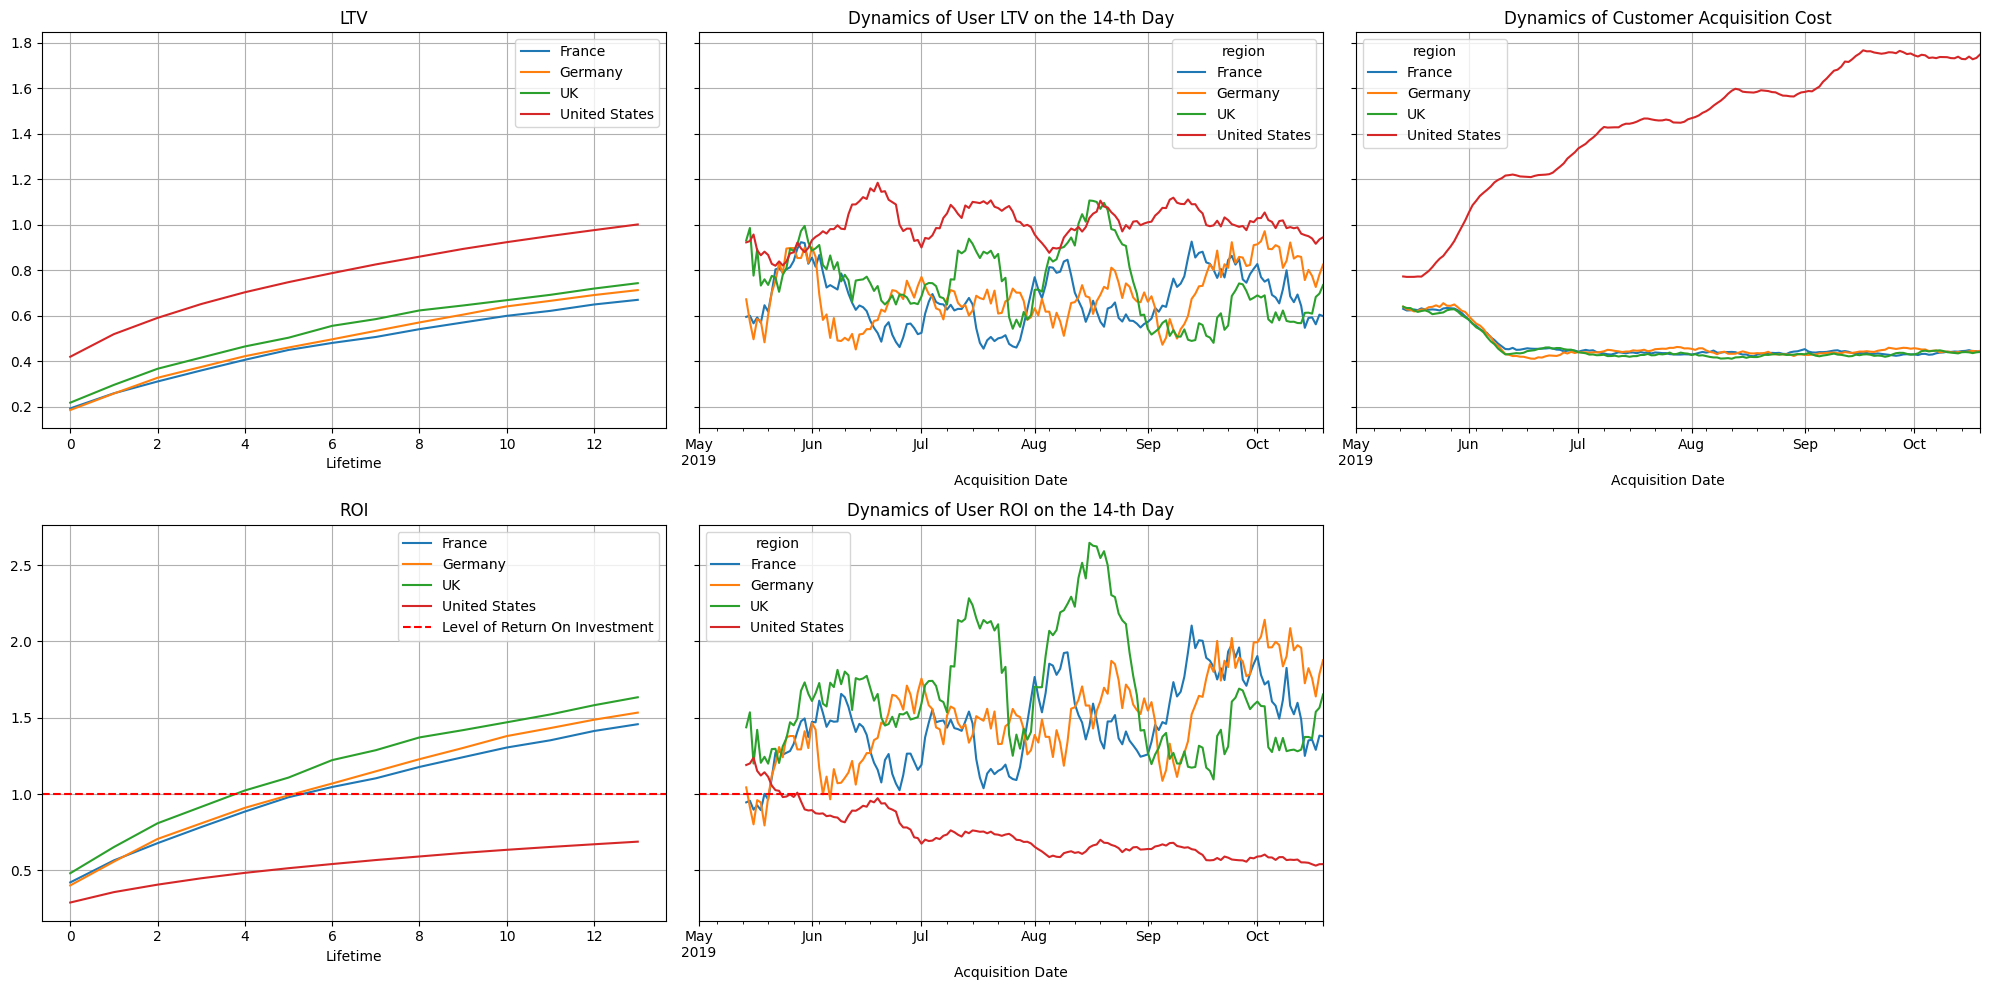

In [65]:
# LTV, CAC and ROI by countries

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

In [66]:
ltv_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,10516,0.193428,0.259783,0.311696,0.360199,0.406892,0.450173,0.481019,0.507213,0.541484,0.570906,0.600042,0.621870,0.649871,0.670278
Germany,9030,0.186350,0.258858,0.327945,0.375473,0.422776,0.460907,0.496938,0.534074,0.571104,0.605367,0.641507,0.665932,0.691355,0.713019
UK,10536,0.218683,0.296762,0.367626,0.416607,0.465505,0.503964,0.556090,0.585644,0.623741,0.645527,0.668830,0.692322,0.719800,0.743481
United States,58562,0.420285,0.519636,0.590981,0.651779,0.703511,0.747926,0.787655,0.825852,0.859873,0.893893,0.923530,0.950849,0.976382,1.001316


In all countries, a good and stable return is observed, with the United States showing a notably higher return compared to European countries (France, Germany, and the United Kingdom). By day 14, LTV in the U.S. reaches its highest value (LTV = 1.0), indicating greater profitability and making this country key for user acquisition.

Customer Acquisition Cost (CAC) is stable and nearly identical across all countries, except for the United States. In European countries, the acquisition cost, starting from May at over 0.6, decreases to approximately 0.45 in June and remains unchanged thereafter. In the United States, CAC starts at a higher value (almost 0.8) compared to Europe and sharply increases from the end of May, crossing the 1.2 mark in early June and rising to 1.75 by November. This significant increase in costs necessitates an analysis of the effectiveness of advertising campaigns in the U.S.

In European countries, advertising is profitable, with ROI exceeding the 1.0 mark by days 4 to 6 and continuing to grow rapidly throughout the two weeks, indicating good investment returns. In the United States, advertising does not yield a return.

The ROI dynamics by day 14 in Europe are stable and positive, whereas in the United States, a sharp decline in ROI is observed in the latter half of May, when the metric reaches zero, with further decreases continuing until the end of the analysis period. This may indicate the ineffectiveness of marketing investments in the U.S. market during this time.

It is worth noting that the volume of users in the U.S. is significantly larger than the total in European countries, meaning that it constitutes a dominant part of the market, which amplifies the impact of the strong rise in customer acquisition costs and poor profitability in the U.S. on the overall picture. ROI issues in the U.S. can significantly distort overall profitability, given the market's scale.

### LTV, CAC and ROI by Advertising Sources 

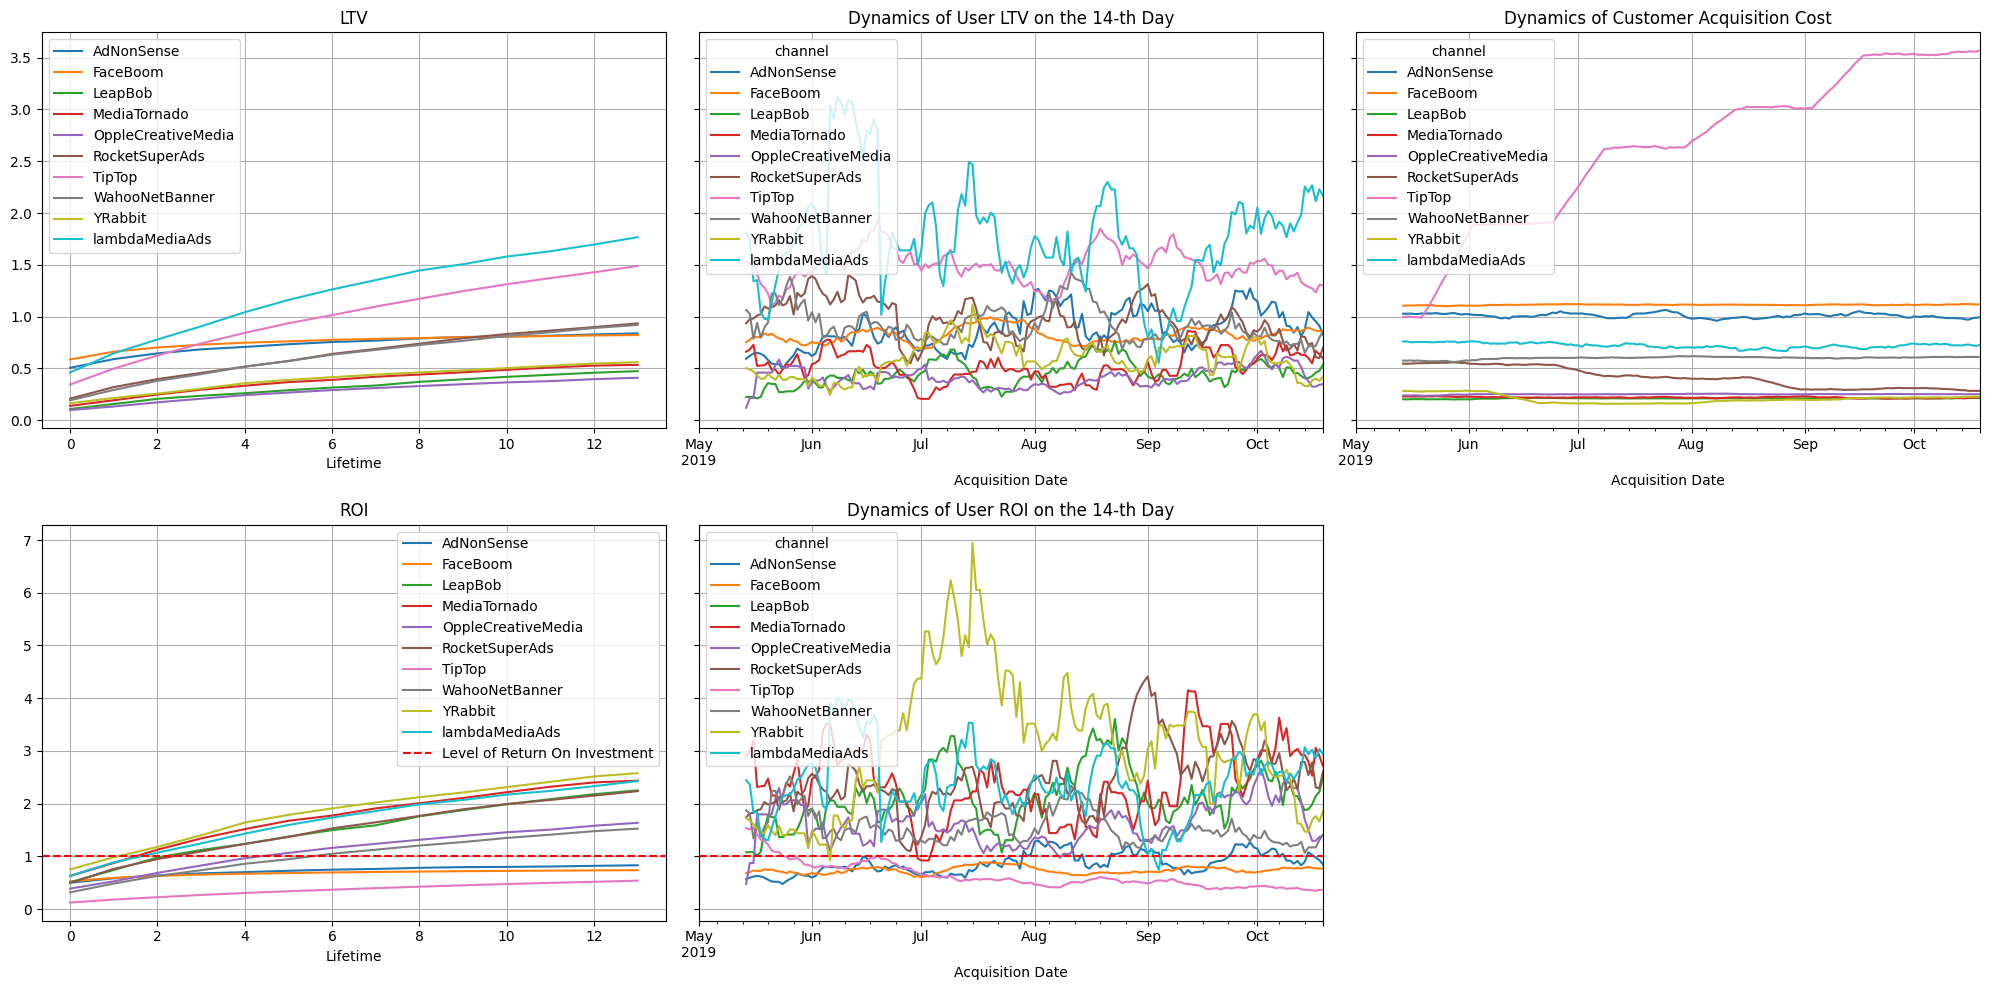

In [67]:
# LTV, CAC and ROI by channels

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

In [68]:
(
    roi_grouped[[0,13]]
    .rename(columns={0: 'ROI_1st_day', 13: 'ROI_14th_day'})
    .sort_values('ROI_14th_day')
)

,ROI_1st_day,ROI_14th_day
channel,,
TipTop,0.124575,0.539532
FaceBoom,0.526040,0.737790
AdNonSense,0.501010,0.831337
WahooNetBanner,0.317853,1.526304
OppleCreativeMedia,0.389100,1.637075
RocketSuperAds,0.497256,2.237019
LeapBob,0.509752,2.252399
lambdaMediaAds,0.632899,2.428712
MediaTornado,0.627684,2.436519


Among all the channels considered, lambdaMediaAds and TipTop have the highest LTV values throughout the two-week period. These channels demonstrate their ability to attract more valuable customers, indicating their effectiveness in acquisition and retention. In comparison, AdNonSense and FaceBoom show weaker LTV growth rates, although their initial LTV values are slightly higher.

For most channels, CAC remains stable; however, for TipTop, CAC significantly increases from 1.0 to 3.5, which may indicate rising costs or declining channel effectiveness.

Channels like TipTop, FaceBoom, and AdNonSense have an ROI below 1.0, meaning that advertising through these channels is not profitable. The channels with the best ROI are YRabbit, MediaTornado, and lambdaMediaAds.

## Conclusions 

After analyzing the data on users of the entertainment app Procrastinate Pro+ over the past six months, we found that advertising efforts aimed at user acquisition are generally not yielding returns. By day 14, the average ROI remains below 1.0, reaching only 0.85. There is a downward trend in ROI by day 14, which may indicate a decline in the effectiveness of advertising campaigns in the long run. The significant increase in customer acquisition costs (CAC) raises concerns. If this trend continues, profitability could become an issue, especially if the growth rate of LTV slows down.

**Devices, Countries, and Advertising Channels Negatively Impacting Advertising Profitability:**

- **Devices**: Advertising is significantly unprofitable for users on  iPhone and Mac, and to a lesser extent, for Android users, as their ROI remains below 1.0 by day 14. This is largely due to the high CAC on these devices, which considerably increases user acquisition costs.

- **Countries**: The U.S. shows the most negative trend in advertising profitability. Despite high LTV, the growth in CAC far outpaces revenue growth, resulting in unprofitable advertising (ROI below 1.0) throughout the two-week period. This indicates inefficiency in advertising investments within the U.S. during the analyzed period.

- **Advertising Channels**: TipTop, FaceBoom, and AdNonSense have an ROI below 1.0 by day 14, indicating unprofitability. This is especially true for TipTop, where CAC significantly increases while effectiveness decreases. FaceBoom and AdNonSense also show weak LTV growth rates and low user retention, further negatively affecting profitability.

Thus, the analysis revealed that, in addition to low retention and high expenses on certain advertising channels, the main profitability issues are tied to rising user acquisition costs in the U.S. and on iPhone and Mac devices. In the U.S., CAC has sharply increased, significantly surpassing the levels seen in European countries. This reduces profitability as revenue growth (LTV) fails to keep pace with the rising costs. The parallel increase in acquisition costs in the U.S. and on iPhone and Mac devices may be linked to the fact that Apple is an American company, and its devices are widely used in this market. Advertising campaigns targeting the U.S. market likely capture a significant share of Apple users, making the U.S. a crucial market for the profitability of iPhone and Mac. Moreover, since U.S. users make up a significant portion of the overall user base, negative trends in the American market have a substantial impact on overall performance across all countries.

**Possible reasons for profitability issues:**

- The rising costs of advertising campaigns could be due to expanding reach toward less loyal audiences or decreasing targeting effectiveness. The sharp increase in CAC suggests that acquiring new users is becoming more expensive, particularly in the U.S. and on iPhone and Mac devices.
- Low user retention on FaceBoom and AdNonSense, especially among paying users, reduces the overall revenue generated from each acquired user. The high conversion rates on these channels may attract less valuable or less loyal users, leading to insufficient long-term retention and, consequently, low profitability.

**Recommendations for the Marketing Department:**

- Conduct an audit of current advertising campaigns to identify and eliminate ineffective strategies. Special attention should be paid to campaigns targeting iPhone and Mac devices, as well as in the U.S., where the lowest profitability is observed.
- Consider user behavior differences across countries when developing advertising strategies. Investigate the reasons for the low advertising efficiency in the U.S. and adapt approaches to this market.
- Utilize more precise targeting methods to attract users with higher potential for long-term retention and higher LTV.
- Conduct a detailed analysis of advertising channels (such as TipTop, FaceBoom, and AdNonSense) to determine the causes of their low profitability. Adjust strategies for using these channels based on the findings.
- Consider reallocating the budget toward channels with higher ROI and lower CAC to improve investment efficiency. Good candidates for further analysis may include lambdaMediaAds and RocketSuperAds, which show strong profitability (ROI greater than 2.0), conversion rates, and retention.
- Develop strategies to increase user retention, especially among paying customers. This may include loyalty programs, improving the user experience, and introducing additional measures to engage customers.
- Regularly conduct surveys and customer satisfaction studies to identify and address issues affecting retention and loyalty.